In [ ]:
from google.colab import drive #내 드라이브와 연동
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Kaggle_Study" 
# %cd 압축을 풀 경로

/content/drive/MyDrive/Colab Notebooks/Kaggle_Study


In [ ]:
#압출 파일 경로 
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/Kaggle_Study/따릉이.zip" 

# 목표
---
* 날짜별, 시간별 기상 상황에 따른 따릉이 대여수 예측하기!   

# 데이터 다루기
* **좋은 데이터**란?


> 한쪽으로 치우치지 않고，불필요한 정보를 가지 
고 있지 않으며. 왜곡되지 않은 데이터.

* 머신러닝과 딥러닝에서 사용할 수 있게 잘 정제된 데이터 형식으로 바꾸는 과정 필요 

1.   속성과 클래스를 먼저 구분하기
* 클래스 - count : 따릉이 대여수
* 속성 - 나머지 컬럼 : 날씨, 기온 등등
2.   데이터 시각화하여 데이터 파악하기


## 데이터 로딩 및 확인

### 데이터 파악
---
> info 함수, head 함수 등을 통해 결측치를 알아본다.

In [2]:
#데이터 불러오기
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle_Study/따릉이/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle_Study/따릉이/test.csv')

In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


#### 결측값 확인
---
> train셋에 모두 결측값인 데이터 2개, test 1개는 제거하고

In [4]:
# 2 column 부터 9 column까지 유실된 것들이 존재.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [5]:
#결측치 개수 확인 방법
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [6]:
train[train.hour_bef_temperature.isnull()] #colum이 기온인 부분이 결측값인 부분만을 표로 나타냄.

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [7]:
train[train.hour_bef_ozone.isnull()] #colum이 기온인 부분이 결측값인 부분만을 표로 나타냄.

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


In [8]:
test.info() #test 데이터도 결측값을 찾아냄.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [9]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [10]:
test[test.hour_bef_temperature.isnull()] #test 데이터의 기온 데이터가 결측값인 부분도 찾아줌.

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 수치 확인

In [11]:
train.describe()
"""
샘플 수(count),평균(mean),표준편차(std),최솟값(min),백분위 수(25%,50%,75%)
"""

'\n샘플 수(count),평균(mean),표준편차(std),최솟값(min),백분위 수(25%,50%,75%)\n'

### 데이터 가공하기 

> 모든 정보가 따릉이 대여량과 어떠한 관계가 있는지 살펴보아야함.

* groupby : column을 기준으로 하는 새 그룹 형성   
 1. split 단계: 컬럼 조건에 따라 독립된 그룹 형성    
 2. apply 단계 : 독립된 그룹끼리 sum을 적용하여 총계가 합산됨   
 3. combine : 독립된 그룹을 종합하여 하나의 테이블로 합침.   
* mean : 평균을 구함
* sort_values : 해당 컬럼을 기준으로 오름차순 정렬을 함.




**기온과 대여량의 관계**     
> 기온이 증가함에 따라 대여량이 증가하는 것을 볼 수 있다. 하지만, 너무 높으면 떨어지는 경향도 있다.



In [12]:
train[['hour_bef_temperature','count']].groupby(['hour_bef_temperature'],as_index=False).mean().sort_values(by='hour_bef_temperature',ascending=True)

,hour_bef_temperature,count
0,3.1,14.0
1,3.2,21.0
2,3.3,7.0
3,4.0,8.0
4,4.2,16.0
...,...,...
240,29.4,130.0
241,29.5,431.0
242,29.6,195.5
243,29.8,215.0


**미세먼지와 대여량 관계**


> 낮을수록 대여량이 높지 않을까 예상했는데 큰 관련이 없는 거 같다.


In [13]:
train[['hour_bef_pm10','count']].groupby(['hour_bef_pm10'],as_index=False).mean().sort_values(by='hour_bef_pm10',ascending=True)

,hour_bef_pm10,count
0,9.0,8.0
1,12.0,21.0
2,13.0,38.0
3,14.0,95.0
4,16.0,40.5
...,...,...
143,223.0,14.5
144,225.0,91.0
145,237.0,91.0
146,252.0,26.0


### 그래프로 표현하기
---
> heatmap 함수 : 두 항목씩 짝을 지은 뒤 어떤 패턴으로 변화하는지 관찰하는 함수. 전혀 다른 패턴이라면 0, 서로 비슷한 패턴이라면 1에 가까운 값을 출력한다.
* dataframe.corr : NA/null을 제외하고 column 간의 상관 계수를 표현.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

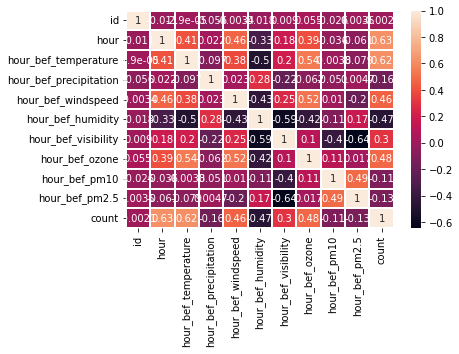

In [15]:
sns.heatmap(train.corr(),linewidths=0.1,annot=True)

**해당 결과를 보아 hour,temperature,ozone,humidity,windspeed 순으로 상관 관계가 높다는 것을 알 수 있다.**


> 상관관계가 높은 항목들만 따로 떼어 항목 간의 관계를
그래프로 확인해보자.



시간대 별 대여량을 살펴보면 
* 0-7시 (새벽-아침 시간) : 사용자가 적다.
* **8시** : 갑자기 증가하는 것으로 보아 출근, 등교 등의 다양한 이유로 사용자가 많다는 것을 알 수 있다.
* 12-18시 : 오후 시간대 쯔음 사용자가 점점 증가함을 알 수 있다.

In [16]:
train.groupby(['hour'],as_index=False).mean()['count']

0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

Text(18, 120, 'leave work')

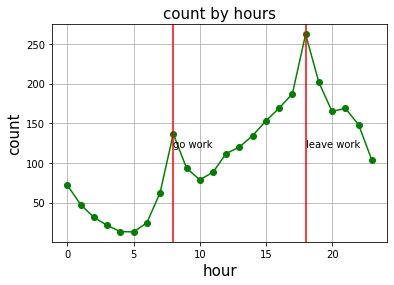

In [17]:
plt.plot(train.groupby('hour').mean()['count'],'go-') #g: green, o-: 점과 선 모두 표현
plt.grid() #그래프에 격자선을 표시해줌

plt.title('count by hours',fontsize=15) #그래프의 title을 표현
plt.xlabel('hour',fontsize=15) #x축에 라벨을 나타냄
plt.ylabel('count',fontsize=15) #y축에 라벨을 나타냄

plt.axvline(8,color='r') #축을 가로지르는 세로선 : x축에서의 위치와 색깔
plt.axvline(18,color='r')

plt.text(8,120,'go work') #text를 넣고 싶은 x,y좌표 위치와 text
plt.text(18,120,'leave work')

In [18]:
"""모딥 pg145 참고하였으나, 해당 class는 0 또는 1의 경우로 나눠지는 사례였으므로 
대여량 데이터에 적합하지 않음.

grid= sns.FacetGrid(grouped,col="count")
grid.map(plt.hist,"hour")
plt.show()
"""

'모딥 pg145 참고하였으나, 해당 class는 0 또는 1의 경우로 나눠지는 사례였으므로 \n대여량 데이터에 적합하지 않음.\n\ngrid= sns.FacetGrid(grouped,col="count")\ngrid.map(plt.hist,"hour")\nplt.show()\n'

## 데이터 전처리
----
> 데이터에 빠진 값이 있다면 평균이나 중앙값으로 대치하는 과정, 전혀 관계없는 이상 데이터가 끼어 있지 않은지, 결과에 미치는 영향이 큰 항목을 발견하는 것이 '데이터 전처리 과정'이다.

**전체 평균이 아닌 시간 별 평균을 이용하여 조금 더 적합한 수치로 채워줌.**
* hour
* temperature
* ozone
* humidity
* windspeed

### train 셋 결측치 채워주기
----


In [35]:
train[train.hour_bef_temperature.isnull()] 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


**기온 데이터 채우기**

In [37]:
#데이터가 없으면 전부 없애줄까 하다가, time과 연관이 깊으니까 평균을 채워주는 식으로.
#시간에 따른 기온 데이터 불러오기.

train[['hour','hour_bef_temperature']].groupby('hour').mean()

,hour_bef_temperature
hour,
0,14.788136
1,14.155738
2,13.747541
3,13.357377
4,13.001639
5,12.673770
6,12.377049
7,12.191803
8,12.600000


In [38]:
#934행 과 1035행 각각에 평균치를 딕셔너리로 대입해줌
train['hour_bef_temperature'].fillna({934:14.788136,1035:20.926667},inplace=True) 

In [42]:
train.loc[[934,1035],:] #채워준 행을 loc 통해 다시 확인해준다.

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [43]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

**windspeed 채우기**

In [48]:
train[['hour','hour_bef_windspeed']].groupby('hour').mean()

,hour_bef_windspeed
hour,
0,1.965517
1,1.836667
2,1.633333
3,1.620000
4,1.409836
5,1.296721
6,1.331148
7,1.262295
8,1.632787


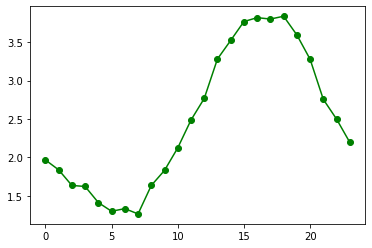

In [49]:
plt.plot(train.groupby('hour').mean()['hour_bef_windspeed'],'go-')
#시간에 따라 바람의 세기가 달라지는 것을 확인

In [50]:
train[train.hour_bef_windspeed.isnull()] 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [51]:
train['hour_bef_windspeed'].fillna({18:3.838333,244:1.836667,
                                    260:1.620000,376:1.965517,
                                    780:3.278333,934:1.965517,
                                    1035:3.838333,1138:2.766667,1229:1.633333},inplace=True)

In [53]:
train.loc[[18,244]]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,3.838333,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.1,0.0,1.836667,55.0,1992.0,NaN,NaN,NaN,38.0


### test 셋 결측치 채워주기

In [55]:
test[test.hour_bef_temperature.isnull()] 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
test[test.hour_bef_windspeed.isnull()] 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


휴 둘다 1개만 채우면 되겟군요

In [57]:
test['hour_bef_temperature'].fillna({653:19.704918},inplace=True)
test['hour_bef_windspeed'].fillna({653:3.595082},inplace=True)


In [58]:
test.loc[[653],:]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,3.595082,NaN,NaN,NaN,NaN,NaN


## 모델링
---


**따릉이 대여량과의 상관계수가 높은 것들을 features로 설정**

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [59]:
features=['hour','hour_bef_temperature','hour_bef_windspeed']
X_train=train[features]
y_train=train['count']
X_test=test[features]

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 3)
(1459,)
(715, 3)


**RandomForest**
> 여러 나무들이 각자 예측을 해서 그걸 종합하는 느낌? (예를 들면, 10 명한테 옷 살까 말까 물어보고  6명이 사라고 했으면 사는 고런 감성?)

In [68]:
#해당 데이터에 적합한 파라미터를 찾아주기 위해 다양한 설정으로 실험함. (튜닝)
model100=RandomForestRegressor(n_estimators=100,random_state=0)
model100_5=RandomForestRegressor(n_estimators=100,max_depth=5,random_state=0)
model200=RandomForestRegressor(n_estimators=200,random_state=0)

In [69]:
#각각 설정한 모델 별로 학습을 진행함
model100.fit(X_train,y_train)
model100_5.fit(X_train,y_train)
model200.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [70]:
#각각 설정한 모델로 예측을 진행함
ypred1=model100.predict(X_test)
ypred2=model100_5.predict(X_test)
ypred3=model200.predict(X_test)

In [75]:
#답안지 제출
submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle_Study/따릉이/submission.csv')
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [77]:
#해당되는 예측값을 답안지에 옮겨 파일로 저장함.
submission['count']=ypred1
submission.to_csv('model100.csv',index=False)

In [78]:
submission['count']=ypred2
submission.to_csv('model100_5.csv',index=False)

In [79]:
submission['count']=ypred3
submission.to_csv('model200.csv',index=False)